### Lab-6 Report
By: Aniket Tiwari   
ID: 8866818

In [9]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [10]:
# Load the iris dataset
iris = load_iris(as_frame=True)
df = iris.frame

#### Redefining the target variable: 1 for virginica, 0 for non-virginica

In [11]:
df['target'] = (df['target'] == 2).astype(int)

In [12]:
df_virginica = df[df['target'] == 1]
df_non_virginica = df[df['target'] == 0]

descriptive_stats_virginica = df_virginica.describe()
descriptive_stats_non_virginica = df_non_virginica.describe()

print("Descriptive Statistics for Virginica:")
descriptive_stats_virginica


Descriptive Statistics for Virginica:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,50.00000,50.000000,50.000000,50.00000,50.0
mean,6.58800,2.974000,5.552000,2.02600,1.0
std,0.63588,0.322497,0.551895,0.27465,0.0
min,4.90000,2.200000,4.500000,1.40000,1.0
25%,6.22500,2.800000,5.100000,1.80000,1.0
50%,6.50000,3.000000,5.550000,2.00000,1.0
75%,6.90000,3.175000,5.875000,2.30000,1.0
max,7.90000,3.800000,6.900000,2.50000,1.0


- There are 50 samples in the dataset.  
- The average sepal length is 6.59 cm, however it can range from 4.9 to 7.9 cm.  
- The average sepal width is 2.97 cm, with a range of 2.2 to 3.8 cm.  
- The length of a petal ranges from 4.5 to 6.9 cm, with a mean of 5.55 cm.  
- Petal width averages 2.03 cm, ranging from 1.4 to 2.5 cm.  
- Every sample falls under the Virginica target category (1.0). 

From the above measures we can say that the data distribution is not skewed.The data distribution seems normal.

In [13]:

print("\nDescriptive Statistics for Non-Virginica:")
descriptive_stats_non_virginica


Descriptive Statistics for Non-Virginica:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,100.000000,100.000000,100.000000,100.000000,100.0
mean,5.471000,3.099000,2.861000,0.786000,0.0
std,0.641698,0.478739,1.449549,0.565153,0.0
min,4.300000,2.000000,1.000000,0.100000,0.0
25%,5.000000,2.800000,1.500000,0.200000,0.0
50%,5.400000,3.050000,2.450000,0.800000,0.0
75%,5.900000,3.400000,4.325000,1.300000,0.0
max,7.000000,4.400000,5.100000,1.800000,0.0


- There are 100 samples in the dataset.
- Average sepal length is 5.47 cm, with a range of 4.3 to 7.0 cm.
- The range of sepal breadth is 2.0–4.4 cm, with a mean of 3.10 cm.
- Petal length ranges from 1.0 to 5.1 cm, with an average of 2.86 cm.
- The average petal width is 0.79 cm, ranging from 0.1 to 1.8 cm.
- Every sample falls into the non-virginica target category (target 0.0).

From the above measures we can say that the data distribution is not skewed.The data distribution seems normal.

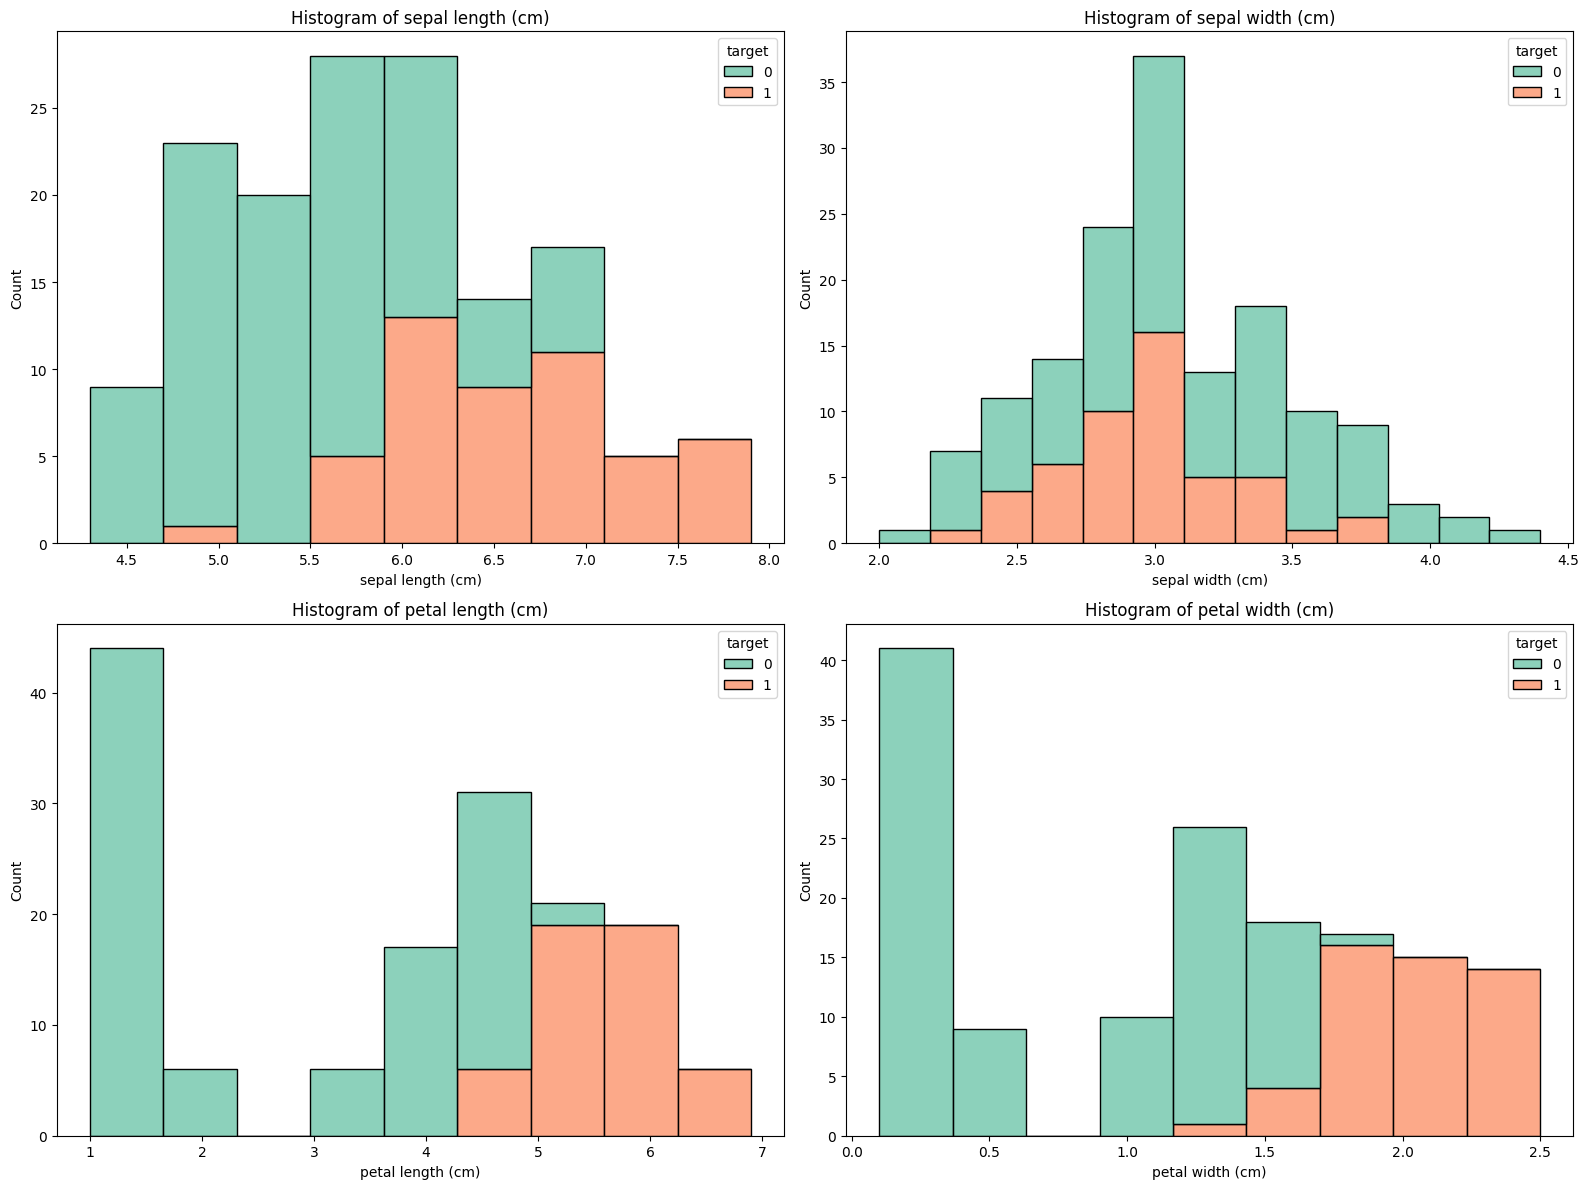

In [14]:
features = iris.feature_names
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
axes = axes.flatten()

# Plot histograms for each feature using seaborn, with hue for class distinction
for i, feature in enumerate(features):
    sns.histplot(data=df, x=feature, hue="target", palette="Set2", multiple="stack", ax=axes[i])
    axes[i].set_title(f'Histogram of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

- There is some overlap in sepal breadth between the two target groups, suggesting less differentiation.
- Non-virginica (Target 0) has lesser petal widths than virginica (Target 1), clearly indicating a separation in petal width.
- Virginica has longer petals and sepals than Non-Virginica.
- According to the histograms, petal measurements allow for a more distinct separation of the two groups than do sepal measures.

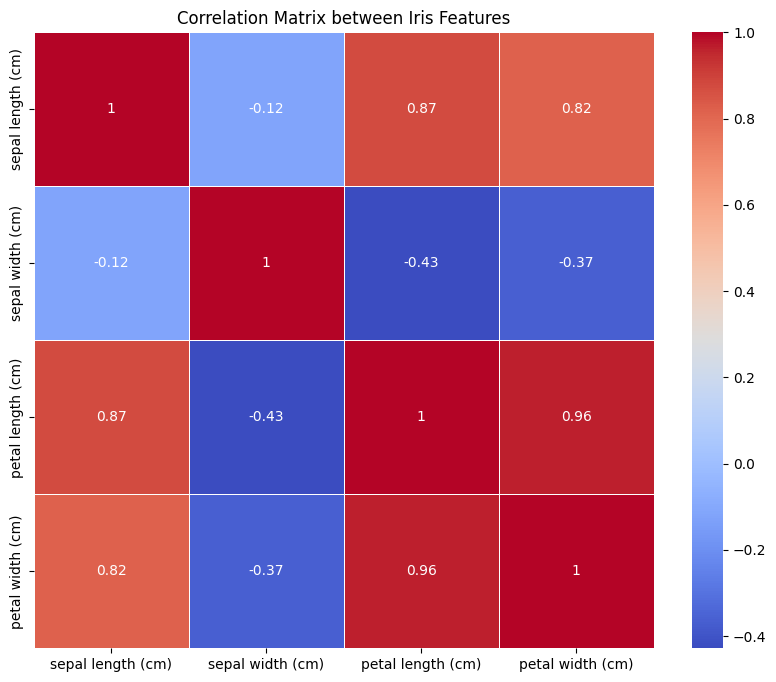

In [15]:
correlation_matrix = df[iris.feature_names].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix between Iris Features')
plt.show()

- Petal length and width have a strong positive correlation (0.96), meaning they grow together.
- Sepal length and petal width (0.82) and length and length of petals (0.87) have a strong positive correlation.
- There is a negative correlation (-0.43) between sepal width and petal length and (-0.37) between sepal width and petal width.
- The very low negative correlation (-0.12) between sepal length and sepal width suggests a little to no linear relationship.
- Measurements of the petals are more correlated with sepal length and each other than they are with any other trait, including sepal width.

Text(0.5, 1.0, 'Petal Length vs. Petal Width')

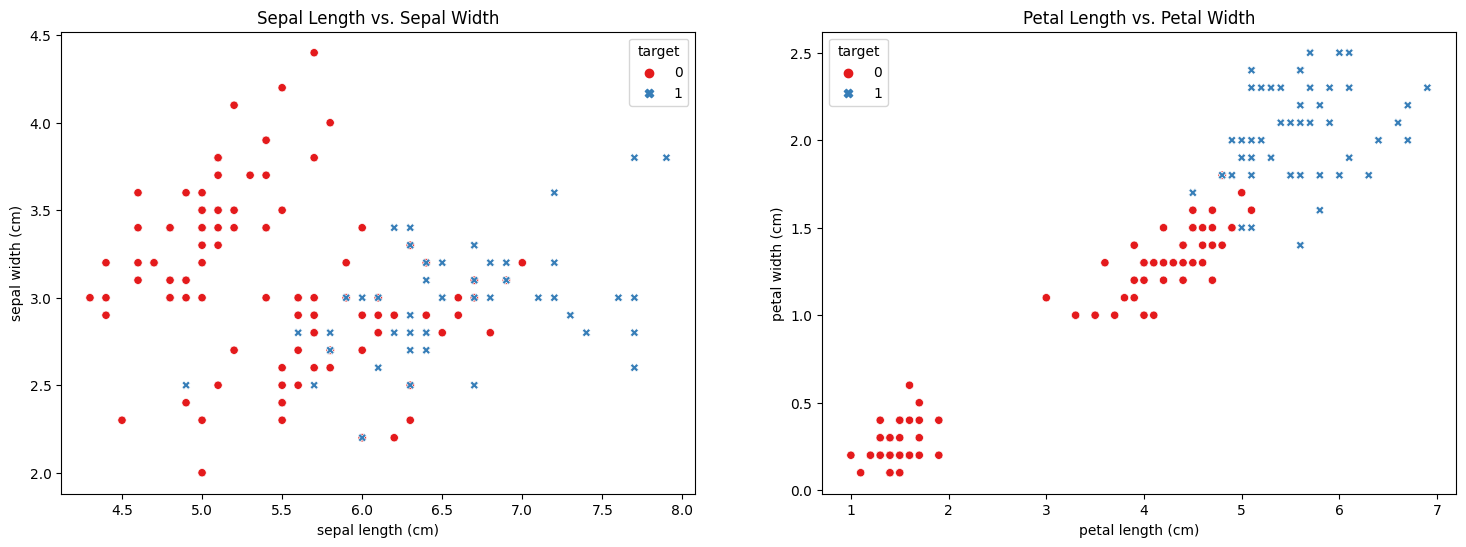

In [16]:
# Set up the matplotlib figure for additional graphs
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Scatter plot of Sepal Length vs. Sepal Width
sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', hue='target', style='target', ax=axes[0], palette='Set1')
axes[0].set_title('Sepal Length vs. Sepal Width')

# Scatter plot of Petal Length vs. Petal Width
sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', hue='target', style='target', ax=axes[1], palette='Set1')
axes[1].set_title('Petal Length vs. Petal Width')

The two target classes in the scatter plot "Sepal Length vs. Sepal Width" are somewhat jumbled and lack a distinct border.
The two target classes can be clearly distinguished from one another in the "Petal Length vs. Petal Width" scatter plot, suggesting that these traits are more effective at doing so.

In comparison to virginica, non-virginca often has shorter petal lengths and widths.
Compared to non-virginica, virginca often has a wider range of sepal lengths and is moved towards higher values.
The concept that petal measurements are a better indicator of the differences between the two target groups than sepal measures is supported by these charts.

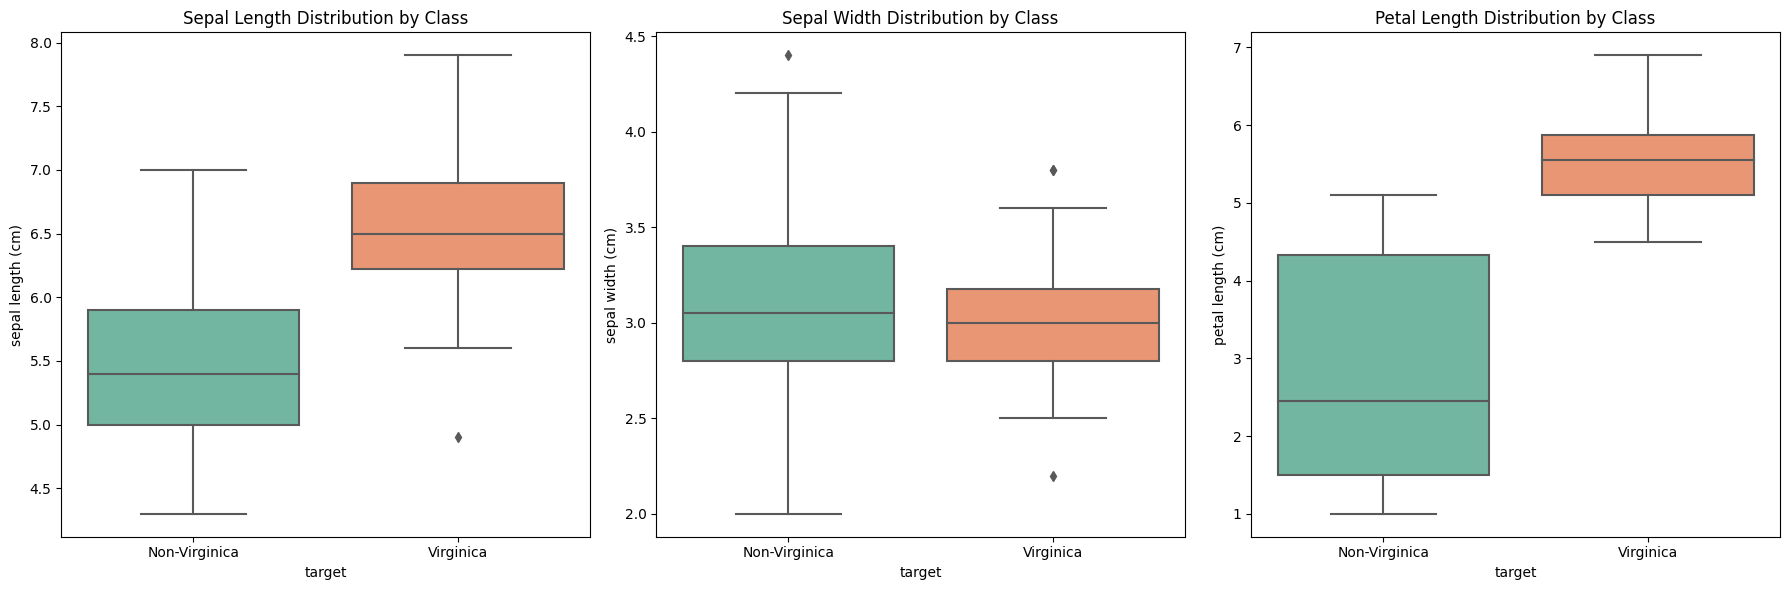

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Box plot for Sepal Length across different classes
sns.boxplot(x='target', y='sepal length (cm)', data=df, ax=axes[0], palette='Set2')
axes[0].set_title('Sepal Length Distribution by Class')
axes[0].set_xticklabels(['Non-Virginica', 'Virginica'])

# Box plot for Sepal Width across different classes
sns.boxplot(x='target', y='sepal width (cm)', data=df, ax=axes[1], palette='Set2')
axes[1].set_title('Sepal Width Distribution by Class')
axes[1].set_xticklabels(['Non-Virginica', 'Virginica'])

# Box plot for Petal Length across different classes (already provided)
sns.boxplot(x='target', y='petal length (cm)', data=df, ax=axes[2], palette='Set2')
axes[2].set_title('Petal Length Distribution by Class')
axes[2].set_xticklabels(['Non-Virginica', 'Virginica'])

plt.tight_layout()
plt.show()

- Comparing Virginica to Non-Virginica, the former often has longer petals and sepals. When it comes to sepal breadth, Non-Virginica is more variable than Virginica.
- Compared to Non-Virginica, Virginica has substantially longer and wider median petals.
- Both for Virginica and Non-Virginica, there are outliers in the sepal width, suggesting some values outside of the usual range.
- The box plots indicate that petal measures are a more useful tool than sepal measurements for differentiating between Virginica and Non-Virginica.

In [18]:
X = df.drop('target', axis=1)
y = df['target']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=120, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, train_size=15, random_state=42, stratify=y_temp)

In [19]:
# Display the sizes of the train, validation, and test sets
print(f"Size of training set: {X_train.shape[0]} records")
print(f"Size of validation set: {X_val.shape[0]} records")
print(f"Size of test set: {X_test.shape[0]} records")

Size of training set: 120 records
Size of validation set: 15 records
Size of test set: 15 records


In [20]:
models = []
features_list = [
    ['petal width (cm)'],  # Model 1: 1 feature
    ['petal width (cm)', 'petal length (cm)'],  # Model 2: 2 features
    ['petal width (cm)', 'petal length (cm)', 'sepal length (cm)'],  # Model 3: 3 features
    ['petal width (cm)', 'petal length (cm)', 'sepal length (cm)', 'sepal width (cm)']  # Model 4: 4 features
]

for features in features_list:
    model = LogisticRegression(max_iter=200)
    model.fit(X_train[features], y_train)    
    models.append(model)
    y_pred = model.predict(X_val[features])
    


In [21]:
model_1_features = ['petal width (cm)']
probas_1 = models[0].predict_proba(X_val[model_1_features])
predictions_1 = models[0].predict(X_val[model_1_features])

df_evaluation_1 = pd.DataFrame({
    'Instance Number': range(1, len(X_val) + 1),
    'Probability of Predicting Virginica': probas_1[:, 1],
    'Actual Prediction by Model': predictions_1,
    'Ground Truth': y_val.reset_index(drop=True),
})

print("Table for Model 1 (1 Feature):")
df_evaluation_1


Table for Model 1 (1 Feature):


,Instance Number,Probability of Predicting Virginica,Actual Prediction by Model,Ground Truth
0,1,0.138330,0,0
1,2,0.261657,0,1
2,3,0.002057,0,0
3,4,0.344920,0,0
4,5,0.003053,0,0
5,6,0.948919,1,1
6,7,0.192584,0,0
7,8,0.006715,0,0
8,9,0.344920,0,0
9,10,0.003053,0,0


In [22]:
# Model 2: Using 2 features
model_2_features = ['petal width (cm)', 'petal length (cm)']

probas_2 = models[1].predict_proba(X_val[model_2_features])
predictions_2 = models[1].predict(X_val[model_2_features])
df_evaluation_2 = pd.DataFrame({
    'Instance Number': range(1, len(X_val) + 1),
    'Probability of Predicting Virginica': probas_2[:, 1],
    'Actual Prediction by Model': predictions_2,
    'Ground Truth': y_val.reset_index(drop=True),
})

print("Table for Model 2 (2 Features):")
df_evaluation_2


Table for Model 2 (2 Features):


,Instance Number,Probability of Predicting Virginica,Actual Prediction by Model,Ground Truth
0,1,0.039276,0,0
1,2,0.779673,1,1
2,3,0.000006,0,0
3,4,0.213253,0,0
4,5,0.000004,0,0
5,6,0.966401,1,1
6,7,0.121628,0,0
7,8,0.000014,0,0
8,9,0.309981,0,0
9,10,0.000005,0,0


In [37]:
# Model 3: Using 3 features
model_3_features = ['petal width (cm)', 'petal length (cm)', 'sepal length (cm)']

probas_3 = models[2].predict_proba(X_val[model_3_features])
predictions_3 = models[2].predict(X_val[model_3_features])
df_evaluation_3 = pd.DataFrame({
    'Instance Number': range(1, len(X_val) + 1),
    'Probability of Predicting Virginica': probas_3[:, 1],
    'Actual Prediction by Model': predictions_3,
    'Ground Truth': y_val.reset_index(drop=True),
})

print("Table for Model 3 (3 Features):")
df_evaluation_3


Table for Model 3 (3 Features):


,Instance Number,Probability of Predicting Virginica,Actual Prediction by Model,Ground Truth
0,1,0.040094,0,0
1,2,0.799722,1,1
2,3,0.000006,0,0
3,4,0.250957,0,0
4,5,0.000003,0,0
5,6,0.963160,1,1
6,7,0.111802,0,0
7,8,0.000013,0,0
8,9,0.270191,0,0
9,10,0.000006,0,0


In [23]:
# Model 4: Using all 4 features
model_4_features = ['petal width (cm)', 'petal length (cm)', 'sepal length (cm)', 'sepal width (cm)']
probas_4 = models[3].predict_proba(X_val[model_4_features])
predictions_4 = models[3].predict(X_val[model_4_features])

df_evaluation_4 = pd.DataFrame({
    'Instance Number': range(1, len(X_val) + 1),
    'Probability of Predicting Virginica': probas_4[:, 1],
    'Actual Prediction by Model': predictions_4,
    'Ground Truth': y_val.reset_index(drop=True),
})

print("Table for Model 4 (All 4 Features):")
df_evaluation_4


Table for Model 4 (All 4 Features):


,Instance Number,Probability of Predicting Virginica,Actual Prediction by Model,Ground Truth
0,1,0.042717,0,0
1,2,0.815452,1,1
2,3,0.000003,0,0
3,4,0.226114,0,0
4,5,0.000002,0,0
5,6,0.961170,1,1
6,7,0.138972,0,0
7,8,0.000008,0,0
8,9,0.251683,0,0
9,10,0.000004,0,0


In [24]:
from sklearn.metrics import accuracy_score, roc_auc_score

# Assuming y_val is already defined and models have been fitted
model_features_list = [
    ['petal width (cm)'],  # Model 1
    ['petal width (cm)', 'petal length (cm)'],  # Model 2
    ['petal width (cm)', 'petal length (cm)', 'sepal length (cm)'],  # Model 3
    ['petal width (cm)', 'petal length (cm)', 'sepal length (cm)', 'sepal width (cm)']  # Model 4
]

for i, features in enumerate(model_features_list):
    # Predictions for the current model
    predictions = models[i].predict(X_val[features])
    
    # Probabilities for the positive class (assuming 'virginica' is encoded as 1)
    probas_virginica = models[i].predict_proba(X_val[features])[:, 1]
    
    # Calculate Accuracy
    accuracy = accuracy_score(y_val, predictions)
    
    # Calculate AUC-ROC
    auc_roc = roc_auc_score(y_val, probas_virginica)
    
    print(f"Model {i+1} with features {features}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"AUC-ROC: {auc_roc:.4f}\n")


Model 1 with features ['petal width (cm)']:
Accuracy: 0.9333
AUC-ROC: 0.9400

Model 2 with features ['petal width (cm)', 'petal length (cm)']:
Accuracy: 1.0000
AUC-ROC: 1.0000

Model 3 with features ['petal width (cm)', 'petal length (cm)', 'sepal length (cm)']:
Accuracy: 1.0000
AUC-ROC: 1.0000

Model 4 with features ['petal width (cm)', 'petal length (cm)', 'sepal length (cm)', 'sepal width (cm)']:
Accuracy: 1.0000
AUC-ROC: 1.0000



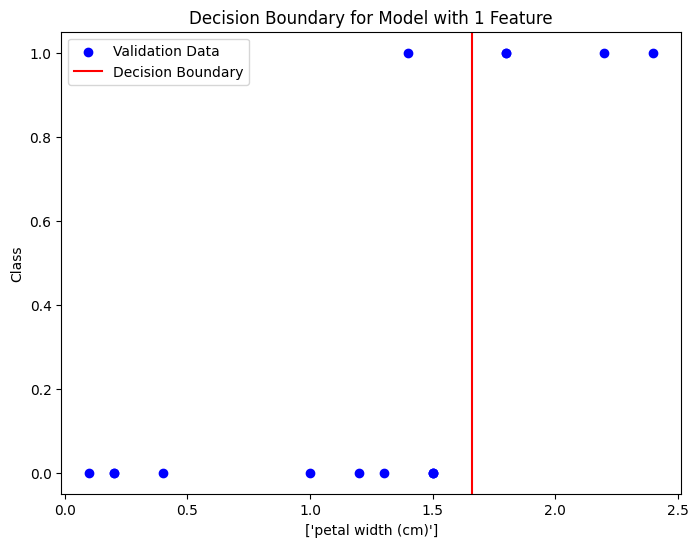

In [43]:
# Model with 1 feature
model = models[0]  
feature = features_list[0] 
decision_boundary = -model.intercept_ / model.coef_[0][0]

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X_val[feature], y_val, color='blue', label='Validation Data')
plt.axvline(x=decision_boundary, color='red', label='Decision Boundary')
plt.xlabel(feature)
plt.ylabel('Class')
plt.legend()
plt.title('Decision Boundary for Model with 1 Feature')
plt.show()


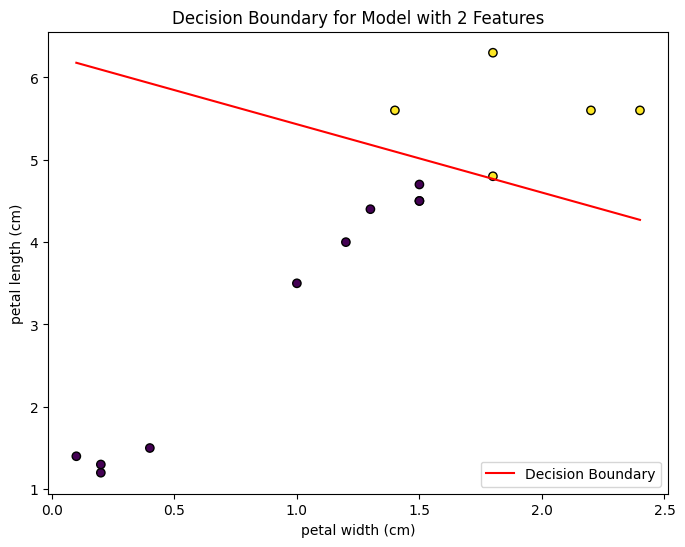

In [44]:
# Model with 2 features
model = models[1]  
features = features_list[1]  
x1 = np.linspace(X_val[features[0]].min(), X_val[features[0]].max(), 100)
decision_boundary_x2 = -model.intercept_ / model.coef_[0][1] - model.coef_[0][0] / model.coef_[0][1] * x1

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X_val[features[0]], X_val[features[1]], c=y_val, cmap='viridis', edgecolor='k')
plt.plot(x1, decision_boundary_x2, color='red', label='Decision Boundary')
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.legend()
plt.title('Decision Boundary for Model with 2 Features')
plt.show()


In [45]:
import plotly.graph_objects as go

# Model with 3 features
model = models[2]  
features = features_list[2]  

# Prepare meshgrid
x1, x2 = np.meshgrid(np.linspace(X_val[features[0]].min(), X_val[features[0]].max(), 100),
                     np.linspace(X_val[features[1]].min(), X_val[features[1]].max(), 100))
decision_boundary_x3 = (-model.intercept_ - model.coef_[0][0] * x1 - model.coef_[0][1] * x2) / model.coef_[0][2]

# Plot
fig = go.Figure(data=[go.Surface(z=decision_boundary_x3, x=x1, y=x2)])
fig.add_trace(go.Scatter3d(x=X_val[features[0]], y=X_val[features[1]], z=X_val[features[2]], mode='markers', marker=dict(size=5, color=y_val, colorscale='Viridis')))
fig.update_layout(title='Decision Boundary for Model with 3 Features', scene=dict(
                    xaxis_title=features[0],
                    yaxis_title=features[1],
                    zaxis_title=features[2]))
fig.show()


In [25]:
failure_analysis = []

for i, model in enumerate(models):
    X_current = X_val[features_list[i]]
    predictions = model.predict(X_current)
    df_analysis = pd.DataFrame({
        'Actual': y_val.reset_index(drop=True),
        'Predicted': predictions,
        'Correct': y_val.reset_index(drop=True) == predictions
    })
    df_incorrect = df_analysis[df_analysis['Correct'] == False]
    failure_modes = df_incorrect['Actual'].value_counts()
    failure_analysis.append((i+1, failure_modes))
for model_number, failure_modes in failure_analysis:
    print(f"Model {model_number} Failure Modes:")
    print(failure_modes)
    print("\n")

Model 1 Failure Modes:
Actual
1    1
Name: count, dtype: int64


Model 2 Failure Modes:
Series([], Name: count, dtype: int64)


Model 3 Failure Modes:
Series([], Name: count, dtype: int64)


Model 4 Failure Modes:
Series([], Name: count, dtype: int64)




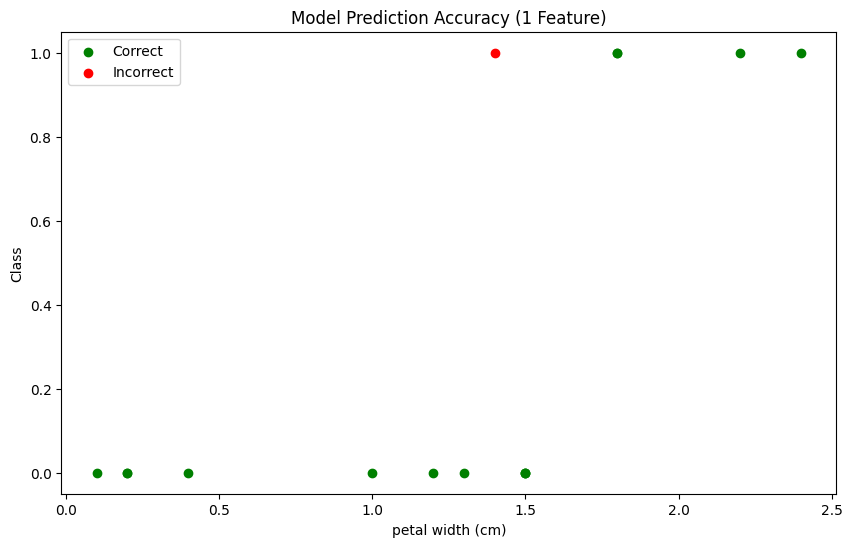

In [47]:
feature_name = 'petal width (cm)'
predictions = models[0].predict(X_val[[feature_name]])

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X_val[feature_name][predictions == y_val], y_val[predictions == y_val], c='green', label='Correct')
plt.scatter(X_val[feature_name][predictions != y_val], y_val[predictions != y_val], c='red', label='Incorrect')
plt.xlabel(feature_name)
plt.ylabel('Class')
plt.title('Model Prediction Accuracy (1 Feature)')
plt.legend()
plt.show()

Key Observations:
- Model 1 exhibits high accuracy (93.33%) and AUC-ROC (0.94), suggesting that it is a strong predictor for the class, albeit with one misclassification. This model solely employs 'petal width (cm)' as a variable.
- Model 2 achieves great classification with 100% accuracy and an AUC-ROC score for both "petal width (cm)" and "petal length (cm)," indicating that these two characteristics combined are very good at predicting the class.
- Model 3, which adds "sepal length (cm)" in addition to the first two features, retains greate classification, suggesting that adding this feature doesn't impair model performance.
- Using all four features, Model 4 also obtains flawless scores, indicating that'sepal width (cm)' does not degrade performance either.
- Model 1's decision boundary visualization demonstrates a distinct linear separation, but the misclassification suggests that it isn't flawless. The plots of Models 2 and 3 demonstrate a non-linear boundary that precisely divides the classes.

Recommendation:
- Model 2, which uses just two characteristics to accomplish great classification, is the most frugal of the three models—Models 3, 4, and 2 all exhibit perfect performance metrics on the validation set. This simplicity can help with comprehension, application, and computational effectiveness.
- In comparison to models with more characteristics, Model 2 is less likely to overfit provided that regularization and training techniques are used similarly.
- Using accuracy and AUC-ROC is best for classification tasks as, AUC-ROC gauges the model's capacity to discriminate between classes at various threshold values, whereas accuracy shows the percentage of accurate predictions.
- As Model 2 doesn't exhibit any failure modes on the validation set, it should function similarly on the test set

To sum up, due to its simplicity and ideal performance metrics, Model 2 with "petal width (cm)" and "petal length (cm)" is advised. It is expected to generalize well to fresh data and strikes an effective balance between feature utilization and classification accuracy.